Decision Tree Regressor

Automatically created module for IPython interactive environment


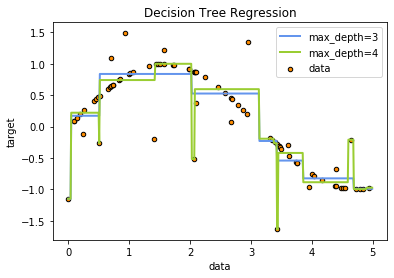

In [3]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
first_depth=3
second_depth=4
regr_1 = DecisionTreeRegressor(max_depth=first_depth)
regr_2 = DecisionTreeRegressor(max_depth=second_depth)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label=f"max_depth={first_depth}", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label=f"max_depth={second_depth}", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [4]:
import pandas as pd

In [5]:
real_estate = pd.read_csv('data/Real estate.csv')

#summary of real_estate data
real_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
real_estate.shape

(414, 8)

In [7]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [8]:
real_estate.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [9]:
real_estate.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [10]:
# Нам не нужны две колонки, поэтому нам необходимо от них избавиться 
real_estate.drop(['No'], axis=1, inplace=True)
# Дату мы не можем использовать 
real_estate.drop(['X1 transaction date'],axis=1, inplace=True)

In [11]:
real_estate.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


<Figure size 432x864 with 0 Axes>

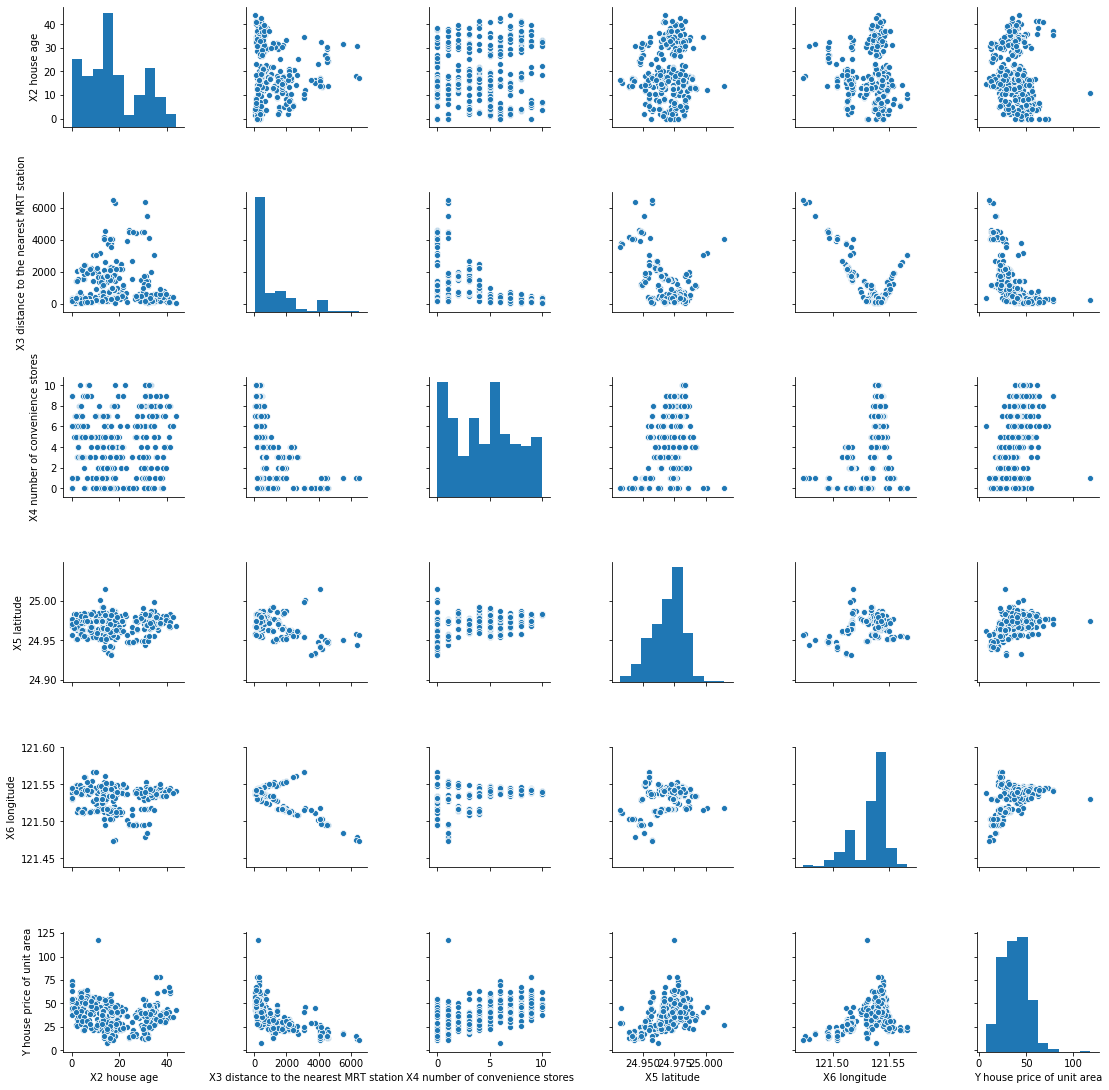

In [12]:
#Visualising all numeric variable
plt.figure(figsize=(6,12))
sns.pairplot(real_estate)
plt.show()

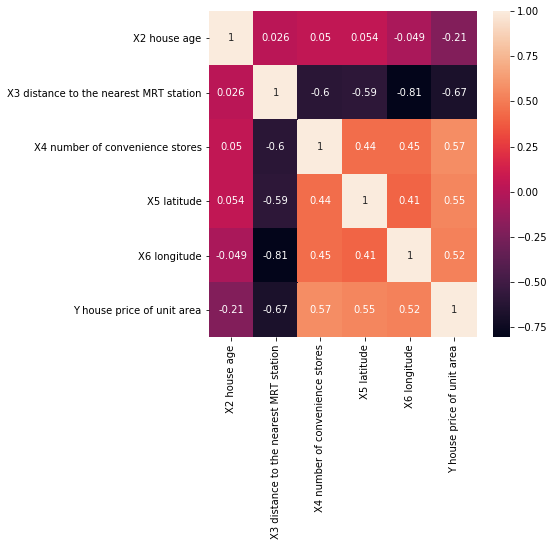

In [13]:
plt.figure(figsize=(6,6))
sns.heatmap(real_estate.corr(),annot=True)

In [14]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

df_train, df_test = train_test_split(real_estate, train_size=0.70, test_size=0.30,random_state=100)
df_train.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
287,19.2,461.1016,5,24.95425,121.53990,32.9
31,29.6,769.4034,7,24.98281,121.53408,25.0
209,34.8,175.6294,8,24.97347,121.54271,40.9
239,18.1,837.7233,0,24.96334,121.54767,29.7
47,35.9,640.7391,3,24.97563,121.53715,61.5


In [17]:
#Dividing X and y sets for model building
y_train = df_train.pop('Y house price of unit area')
X_train = df_train
y_train.head()

KeyError: 'Y house price of unit area'

In [18]:
y_train.head()

287    32.9
31     25.0
209    40.9
239    29.7
47     61.5
Name: Y house price of unit area, dtype: float64

In [19]:
X_train.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
287,19.2,461.1016,5,24.95425,121.53990
31,29.6,769.4034,7,24.98281,121.53408
209,34.8,175.6294,8,24.97347,121.54271
239,18.1,837.7233,0,24.96334,121.54767
47,35.9,640.7391,3,24.97563,121.53715


In [20]:

#import Linear regression
from sklearn.linear_model import LinearRegression


In [21]:
#fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lm.coef_

array([-2.81980885e-01, -4.70761718e-03,  1.08604498e+00,  2.12564677e+02,
       -3.80314555e+01])

In [23]:
#The coefficient of all independent variable are as follows
coeff = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficient'])
coeff

,coefficient
X2 house age,-0.281981
X3 distance to the nearest MRT station,-0.004708
X4 number of convenience stores,1.086045
X5 latitude,212.564677
X6 longitude,-38.031455


In [28]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train)
lm_1 = sm.OLS(y_train, X_train).fit()
print(lm_1.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.942
Model:                                    OLS   Adj. R-squared (uncentered):              0.941
Method:                         Least Squares   F-statistic:                              930.6
Date:                        Wed, 19 Aug 2020   Prob (F-statistic):                   9.41e-174
Time:                                17:14:21   Log-Likelihood:                         -1065.4
No. Observations:                         289   AIC:                                      2141.
Df Residuals:                             284   BIC:                                      2159.
Df Model:                                   5                                                  
Covariance Type:                    nonrobust                                                  
                                        

VIF означает "variance inflation factor", что переводится на русский язык как "фактор инфляции дисперсии" - чем он выше для j-го предиктора, тем сильнее линейная связь между этим и остальными предикторами. ... Обычно критическим считают значение VIF = 5, несколько реже VIF = 10.

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.071049e+08
2,X3 distance to the nearest MRT station,4.510000e+00
5,X6 longitude,3.170000e+00
3,X4 number of convenience stores,1.600000e+00
4,X5 latitude,1.590000e+00
1,X2 house age,1.020000e+00


In [48]:
y_train_price = lm_1.predict(X_train)

Гистограмма распределения ошибок

Text(0.5, 0, 'Error')

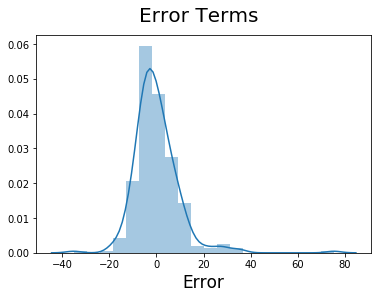

In [49]:
#plot histogram of error terms
fig = plt.figure()
sns.distplot((y_train-y_train_price), bins=20)
fig.suptitle('Error Terms',fontsize = 20)
plt.xlabel('Error',fontsize=17)

Prediction

In [2]:
y_test = df_test.pop('Y house price of unit area')
X_test = df_test

NameError: name 'df_test' is not defined

In [ ]:
y_test_pred = lm_1.predict(X_test)

In [3]:
#import library
from sklearn.metrics import r2_score

Коэффициент детерминации — это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости, то есть объясняющими переменными. Более точно — это единица минус доля необъяснённой дисперсии (дисперсии случайной ошибки модели, или условной по факторам дисперсии зависимой переменной) в дисперсии зависимой переменной. Его рассматривают как универсальную меру зависимости одной случайной величины от множества других.
![](https://miro.medium.com/max/548/1*X0_3mtDXwuhd3dl88xR4yA.png)

In [ ]:
#Evaluate r2
r2_score(y_true=y_test,y_pred=y_test_pred)

Построим сравнительные графики для оценки качества модели

In [53]:
df = pd.DataFrame({'Actual':y_test,'Predictions':y_test_pred})
df['Predictions']= round(df['Predictions'])
df.head()

,Actual,Predictions
121,48.0,42.0
353,31.3,36.0
96,59.5,52.0
43,34.1,42.0
125,48.6,48.0


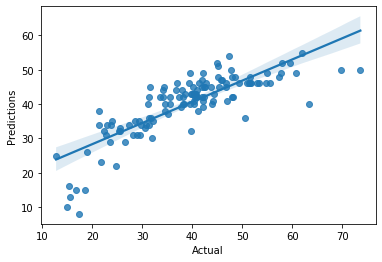

In [54]:
sns.regplot('Actual','Predictions',data=df)

In [55]:
from sklearn import metrics

#Mean absolute error(MAE)
# Средний модуль отклонения (MAE – Mean Absolute Error
print('MAE',metrics.mean_absolute_error(y_test,y_test_pred))

#Mean squared error(MSE)
print('MSE',metrics.mean_squared_error(y_test,y_test_pred))

#Root mean squared error(RMSE)
# RMSE – Root Mean Squared Error, коэффициент детерминации (R2)
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

MAE 5.423374508834548
MSE 47.86553891851763
RMSE 6.918492532229664
